<a href="https://colab.research.google.com/github/snehabirari/ML-projects/blob/main/UCI_SECOM_PROJECT_SNEHA_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE


## Introduction to a Data Science Project on the UCI ML Repository SECOM Dataset

**Dataset Overview:**

This project centers around the analysis of the SECOM dataset, a substantial and detailed collection of data from a semiconductor manufacturing process.

**The first file** contains 1567 rows, with 591 features. These features represent various measurements and sensor readings captured during the manufacturing process.

**The second file** consists of corresponding labels for each row, providing a pass/fail classification along with a date-time stamp that marks the point of each test within the manufacturing cycle.

**Data Characteristics:**

Reflecting real-world data conditions, the SECOM dataset authors alert the Data Scientist embarking on this project of the presence of null values, with the intensity of these missing values varying across different features. This aspect of the dataset is a common challenge in data analysis and will be addressed through thoughtful pre-processing techniques.


**Project Objective:**

The primary goal of this machine learning project is to uncover and understand the most predictive features that influence the pass/fail outcomes of the semiconductor manufacturing process.

The stakeholder has requested us to identify a subset of features that hold the most significant predictive power, and explore the causal relationships among these key features and how they impact the overall pass/fail rates, providing insights that could be vital for process improvement and quality control.

In [ ]:
df = pd.read_csv('/content/uci-secom.csv')
df.head()

,Time,0,1,2,3,4,5,6,7,8,...,581,582,583,584,585,586,587,588,589,Pass/Fail
0,2008-07-19 11:55:00,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,...,NaN,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN,-1
1,2008-07-19 12:32:00,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,...,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045,-1
2,2008-07-19 13:17:00,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,...,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602,1
3,2008-07-19 14:43:00,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,...,73.8432,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432,-1
4,2008-07-19 15:22:00,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,...,NaN,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432,-1


In [ ]:
df.shape

(1567, 592)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1567 entries, 0 to 1566
Columns: 592 entries, Time to Pass/Fail
dtypes: float64(590), int64(1), object(1)
memory usage: 7.1+ MB


In [ ]:
df.isna().sum().sum()

41951

In [ ]:
missing_data_in_percentage = (df.isna().sum())/(df.shape[0])*100
missing_data_in_percentage

,0
Time,0.000000
0,0.382897
1,0.446713
2,0.893427
3,0.893427
...,...
586,0.063816
587,0.063816
588,0.063816
589,0.063816


**Observation:** There's a significant amount null values in the data set. According to the SECOM dataset authors null values correspond to no recorded measurement for a particular feature.

In [ ]:
def null_val(df, threshold):
  null_columns = [col for col in df.columns if df[col].isnull().sum()/len(df[col]) > threshold]
  return df.drop(columns = null_columns)

In [ ]:
df = null_val(df=df,threshold=0.1)

In [ ]:
df_nulls = [col for col in df.columns if df[col].isnull().sum()>0]

In [ ]:
df[df_nulls].isnull().sum().max() #Reduced to a maximum of 40 rows

51

In [ ]:
for col in df_nulls:
    df[col] = df[col].fillna(df[col].mean())
df.isna().sum().sum()

0

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,577,582,583,584,585,586,587,588,589,Pass/Fail
count,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.0,1567.000000,1567.000000,1567.000000,1567.000000,...,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000
mean,3014.452896,2495.850231,2200.547318,1396.376627,4.197013,100.0,101.112908,0.121822,1.462862,-0.000841,...,16.642363,0.500096,0.015318,0.003847,3.067826,0.021458,0.016475,0.005283,99.670066,-0.867262
std,73.480613,80.227793,29.380932,439.712852,56.103066,0.0,6.209271,0.008936,0.073849,0.015107,...,12.485267,0.003403,0.017174,0.003719,3.576891,0.012354,0.008805,0.002866,93.861936,0.498010
min,2743.240000,2158.750000,2060.660000,0.000000,0.681500,100.0,82.131100,0.000000,1.191000,-0.053400,...,4.582000,0.477800,0.006000,0.001700,1.197500,-0.016900,0.003200,0.001000,0.000000,-1.000000
25%,2966.665000,2452.885000,2181.099950,1083.885800,1.017700,100.0,97.937800,0.121100,1.411250,-0.010800,...,11.501550,0.497900,0.011600,0.003100,2.306500,0.013450,0.010600,0.003300,44.368600,-1.000000
50%,3011.840000,2498.910000,2200.955600,1287.353800,1.317100,100.0,101.492200,0.122400,1.461600,-0.001300,...,13.817900,0.500200,0.013800,0.003600,2.757700,0.020500,0.014800,0.004600,72.023000,-1.000000
75%,3056.540000,2538.745000,2218.055500,1590.169900,1.529600,100.0,104.530000,0.123800,1.516850,0.008400,...,17.080900,0.502350,0.016500,0.004100,3.294950,0.027600,0.020300,0.006400,114.749700,-1.000000
max,3356.350000,2846.440000,2315.266700,3715.041700,1114.536600,100.0,129.252200,0.128600,1.656400,0.074900,...,96.960100,0.509800,0.476600,0.104500,99.303200,0.102800,0.079900,0.028600,737.304800,1.000000


In [ ]:
df.drop(columns = ['Time'],inplace=True)

Checking constant columns

In [ ]:
constant_col=[]
for i in df.columns:
    if df[i].std()==0:
      constant_col.append(i)

In [ ]:
len(constant_col) #total constant columns

116

In [ ]:
constant_columns = df[constant_col]
constant_columns

,5,13,42,49,52,69,97,141,149,178,...,529,530,531,532,533,534,535,536,537,538
0,100.0,0.0,70.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,100.0,0.0,70.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100.0,0.0,70.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100.0,0.0,70.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,100.0,0.0,70.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1562,100.0,0.0,70.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1563,100.0,0.0,70.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1564,100.0,0.0,70.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1565,100.0,0.0,70.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


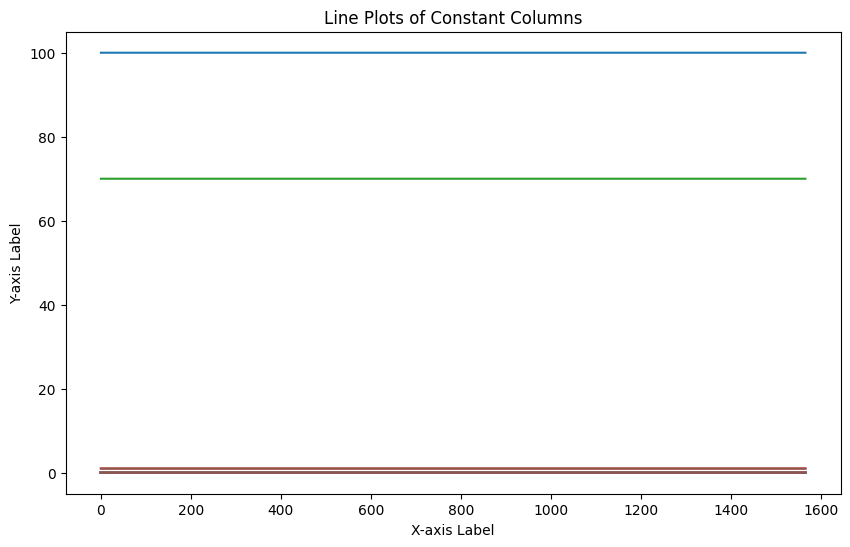

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(constant_columns)
plt.xlabel('X-axis Label')  # Replace with your x-axis label
plt.ylabel('Y-axis Label')  # Replace with your y-axis label
plt.title('Line Plots of Constant Columns')
plt.show()

**Observation** : we see standard deviation or variance for most of the columns is around '0' means that columns are constant. This could indicate that some of sensors are monitoring stability. these column has low variance it will not give any info and it not improve the model performanance and create noise. So better we should remove that constant columns

---



In [ ]:
# Remove '112' constatnt columns
df.drop(columns = constant_columns, inplace=True)

In [ ]:
df.head()

,0,1,2,3,4,6,7,8,9,10,...,577,582,583,584,585,586,587,588,589,Pass/Fail
0,3030.93,2564.00,2187.7333,1411.1265,1.3602,97.6133,0.1242,1.5005,0.0162,-0.0034,...,14.9509,0.5005,0.0118,0.0035,2.3630,0.021458,0.016475,0.005283,99.670066,-1
1,3095.78,2465.14,2230.4222,1463.6606,0.8294,102.3433,0.1247,1.4966,-0.0005,-0.0148,...,10.9003,0.5019,0.0223,0.0055,4.4447,0.009600,0.020100,0.006000,208.204500,-1
2,2932.61,2559.94,2186.4111,1698.0172,1.5102,95.4878,0.1241,1.4436,0.0041,0.0013,...,9.2721,0.4958,0.0157,0.0039,3.1745,0.058400,0.048400,0.014800,82.860200,1
3,2988.72,2479.90,2199.0333,909.7926,1.3204,104.2367,0.1217,1.4882,-0.0124,-0.0033,...,8.5831,0.4990,0.0103,0.0025,2.0544,0.020200,0.014900,0.004400,73.843200,-1
4,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.3967,0.1235,1.5031,-0.0031,-0.0072,...,10.9698,0.4800,0.4766,0.1045,99.3032,0.020200,0.014900,0.004400,73.843200,-1


In [ ]:
# Replace '-1' with '0' in 'Pass/Fail' column
df['Pass/Fail'] = df['Pass/Fail'].replace(-1,0)

In [ ]:
df['Pass/Fail'].astype('category')

,Pass/Fail
0,0
1,0
2,1
3,0
4,0
...,...
1562,0
1563,0
1564,0
1565,0


# Checking Outliers

In [ ]:
for i in df.columns:
  Q1 = df[i].quantile(0.25)
  Q3 = df[i].quantile(0.75)
  IQR =Q3-Q1
  data = df[(df[i]>=Q1-1.5*IQR) & (df[i]<=Q3+1.5*IQR)]

In [ ]:
len(data)    #Tells us each row contains atleast 1 outlier in dataset

1463

Outliers are there in the dataset but will not remove because if will remove we will lose important insights

In [ ]:
df.shape

(1567, 423)

# Feature Engineering

# Check correlation

In [ ]:
corr = df.corr()
corr

,0,1,2,3,4,6,7,8,9,10,...,577,582,583,584,585,586,587,588,589,Pass/Fail
0,1.000000,-0.143840,0.004756,-0.007613,-0.011014,0.002270,0.031483,-0.052622,0.009045,0.006504,...,0.008601,0.000224,0.023453,0.019907,0.023589,0.018443,-0.025880,-0.028166,0.004174,-0.025141
1,-0.143840,1.000000,0.005767,-0.007568,-0.001636,-0.025564,-0.012037,0.031258,0.023964,0.009645,...,-0.010145,0.043556,0.002904,-0.001264,0.002273,-0.009403,0.017266,0.010118,0.044797,-0.002603
2,0.004756,0.005767,1.000000,0.298935,0.095891,-0.136225,-0.146213,0.023528,0.016168,0.069893,...,-0.028705,-0.006023,0.015697,0.018225,0.015752,-0.025495,-0.029345,-0.030818,-0.032890,-0.000957
3,-0.007613,-0.007568,0.298935,1.000000,-0.058483,-0.685835,0.073856,-0.102892,0.068215,0.049873,...,0.016438,0.008988,0.025436,0.024736,0.026019,0.034711,-0.039132,-0.033645,-0.080341,-0.024623
4,-0.011014,-0.001636,0.095891,-0.058483,1.000000,-0.074368,-0.347734,-0.025946,0.054206,-0.006470,...,-0.004070,0.045081,-0.001300,-0.001597,-0.001616,-0.043929,-0.031005,-0.026100,0.050910,-0.013756
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
586,0.018443,-0.009403,-0.025495,0.034711,-0.043929,-0.041209,0.058113,0.010433,0.033738,0.000327,...,-0.002684,-0.016726,0.002257,0.001605,0.002743,1.000000,0.167913,0.164238,-0.486559,0.004156
587,-0.025880,0.017266,-0.029345,-0.039132,-0.031005,0.034027,-0.021426,0.022845,0.059301,0.046965,...,-0.009405,-0.024473,-0.002649,-0.002498,-0.002930,0.167913,1.000000,0.974276,0.390813,0.035391
588,-0.028166,0.010118,-0.030818,-0.033645,-0.026100,0.032227,-0.020893,0.026250,0.060758,0.046048,...,-0.015596,-0.020705,-0.002260,-0.001957,-0.002530,0.164238,0.974276,1.000000,0.389211,0.031167
589,0.004174,0.044797,-0.032890,-0.080341,0.050910,0.043777,-0.107804,-0.022770,0.004880,0.008393,...,-0.024766,0.041486,-0.003008,-0.003295,-0.003800,-0.486559,0.390813,0.389211,1.000000,-0.002653


Now we will check features which are less correlated with target column

In [ ]:
correlation = corr['Pass/Fail'].abs()  #take absolute value since will only care about strength not direction

# Remove features which are less correlated to target variable set threshhold 0.05
filter_features1 = correlation[correlation >= 0.05].index

filter_features = filter_features1.drop('Pass/Fail')
filter_features

Index(['14', '21', '22', '26', '28', '32', '33', '38', '40', '56', '58', '59',
       '63', '64', '65', '68', '70', '76', '79', '90', '95', '100', '103',
       '114', '121', '122', '123', '124', '125', '126', '127', '129', '130',
       '133', '159', '160', '163', '164', '165', '166', '180', '183', '196',
       '197', '199', '200', '205', '210', '249', '280', '294', '295', '298',
       '299', '300', '316', '319', '337', '348', '365', '387', '430', '431',
       '434', '435', '436', '437', '452', '455', '460', '468', '469', '471',
       '477', '510', '511', '542', '543', '573', '575'],
      dtype='object')

In [ ]:
#create new dataframe with filter features

filter_df = df[filter_features.tolist() + ['Pass/Fail']]

filter_df

,14,21,22,26,28,32,33,38,40,56,...,469,471,477,510,511,542,543,573,575,Pass/Fail
0,7.955800,-5419.00,2916.50,1.7730,64.2333,83.3971,9.5126,86.9555,61.29,0.9317,...,5.7277,9.7752,5.8142,64.6707,0.0000,0.1096,0.0078,0.3157,0.1026,0
1,10.154800,-5441.50,2604.25,2.0143,68.4222,84.9052,9.7997,87.5241,78.25,0.9324,...,5.5652,10.2211,5.8042,141.4365,0.0000,0.1096,0.0078,0.2653,0.0772,0
2,9.515700,-5447.75,2701.75,2.0295,67.1333,84.7569,8.6590,84.7327,14.37,0.9139,...,5.4178,8.3977,9.1221,240.7767,244.2748,0.1096,0.0078,0.1882,0.0640,1
3,9.605200,-5468.25,2648.25,2.0038,62.9333,84.9105,8.6789,86.6867,76.90,0.9139,...,6.5291,9.1494,6.4746,113.5593,0.0000,0.1096,0.0078,0.1738,0.0525,0
4,10.566100,-5476.25,2635.25,1.9912,62.8333,86.3269,8.7677,86.1468,76.39,0.9298,...,4.4384,7.4365,6.1979,148.0663,0.0000,0.1096,0.0078,0.2224,0.0706,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1562,11.769200,-5418.75,2608.00,1.9540,71.1444,83.8405,8.7164,86.3672,81.21,0.9204,...,5.6185,7.1140,4.4358,53.1915,235.7895,0.1180,0.0104,0.2363,0.0785,0
1563,9.162000,-6408.75,2277.50,1.8023,72.8444,84.0623,8.9607,86.4051,79.43,0.9255,...,5.4999,6.6554,6.5896,29.4372,700.0000,0.1120,0.0102,0.3891,0.1213,0
1564,9.005371,-5153.25,2707.00,1.9435,71.2667,85.8638,8.1728,86.3506,82.03,0.9353,...,6.2376,3.3785,3.4878,54.8330,0.0000,0.1119,0.0089,0.4154,0.1352,0
1565,9.735400,-5271.75,2676.50,1.9880,70.5111,84.5602,9.1930,86.3130,81.13,0.9207,...,5.6161,8.0979,7.6907,78.4993,456.4103,0.1180,0.0104,0.3669,0.1040,0


In [ ]:
removed_features = len(corr)-len(filter_features1)
removed_features

342

Note : We have removed '342' features with low correlation with target feature

Now we have 81 features

Now will check correlation using heatmap

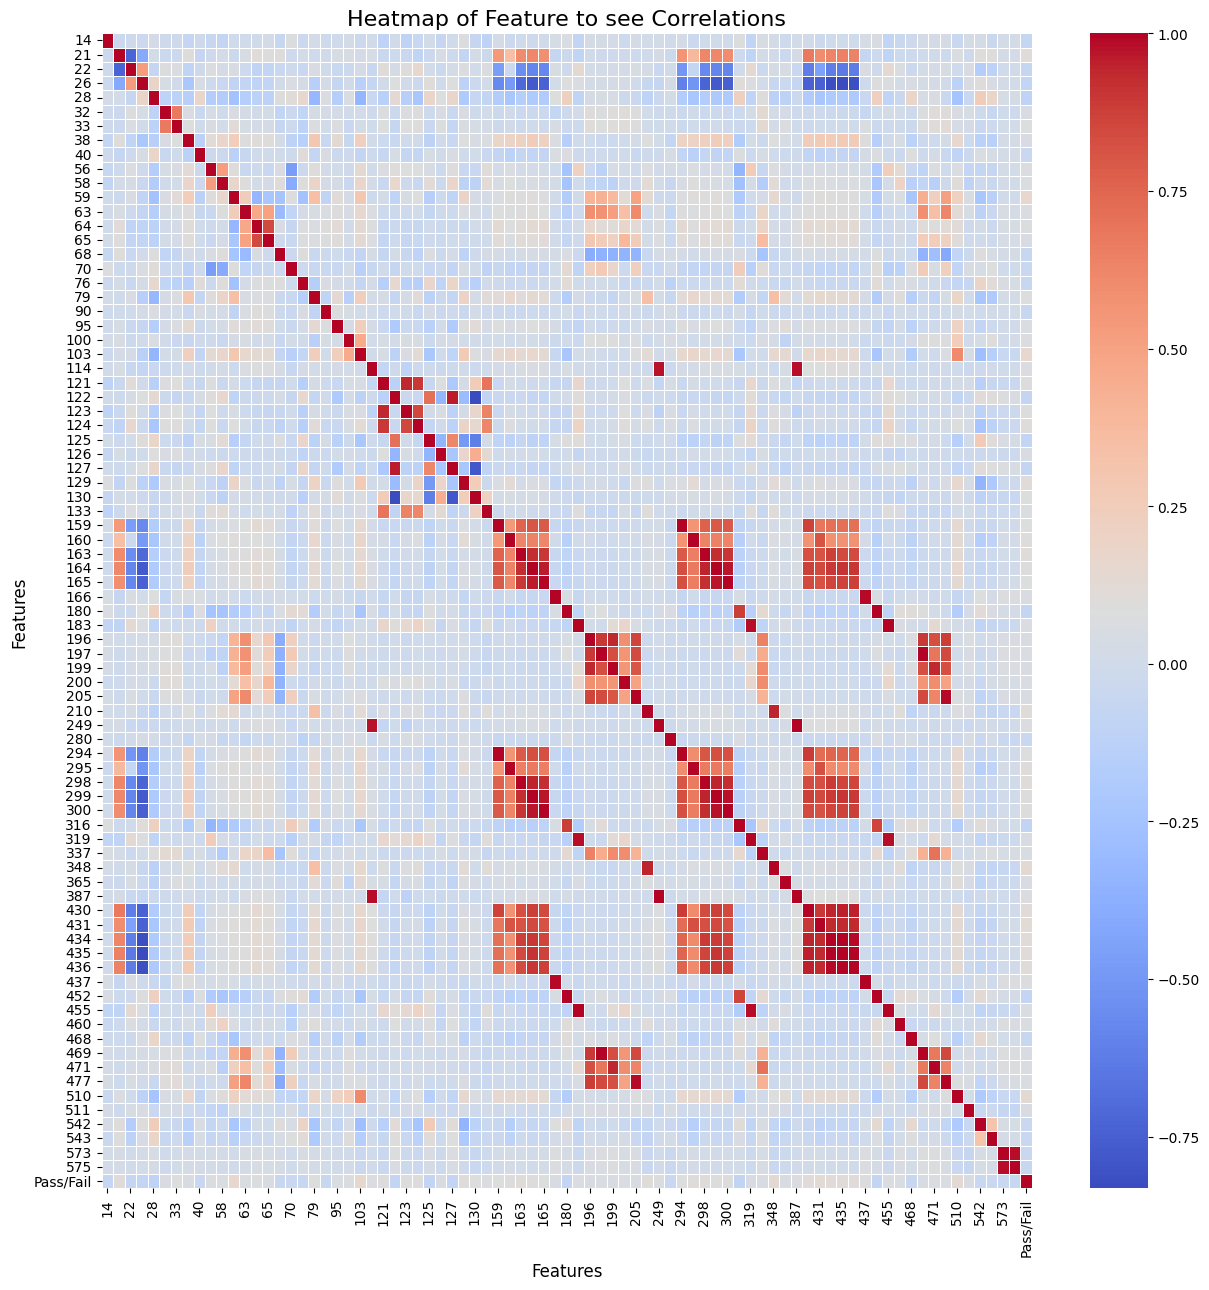

In [ ]:
plt.figure(figsize =(15,15))  #adjust the size of heatmap

#Plot Heatmap
sns.heatmap(filter_df.corr(), annot=False, cmap='coolwarm', linewidth=0.5)

#Add Title and Labels
plt.title('Heatmap of Feature to see Correlations', fontsize=16)
plt.xlabel('Features', fontsize=12)
plt.ylabel('Features', fontsize=12)

plt.show()


Some of the features are highly correlated with each other and less corelated to target as well.

In [ ]:
correlation = filter_df.corr()

In [ ]:
# Identify highly correlated features
threshold = 0.8  # Adjust the threshold as needed

highly_correlated_features = set()
for i in range(len(correlation.columns)):
    for j in range(i):
        if abs(correlation.iloc[i, j]) > threshold:
            colname = correlation.columns[i]
            highly_correlated_features.add(colname)

print("Highly correlated features:", highly_correlated_features)


Highly correlated features: {'123', '435', '455', '298', '434', '130', '124', '197', '348', '65', '387', '452', '477', '249', '127', '300', '471', '575', '165', '205', '436', '437', '316', '430', '199', '469', '295', '164', '319', '431', '299', '294'}


In [ ]:
len(highly_correlated_features)

32

In [ ]:
highly_corr_ind_feture = filter_df[list(highly_correlated_features)+['Pass/Fail']]

In [ ]:
sort_features = highly_corr_ind_feture.corr()['Pass/Fail'].abs()
sort_features.sort_values(ascending=False)

,Pass/Fail
Pass/Fail,1.000000
348,0.130108
431,0.120304
434,0.111609
430,0.109569
435,0.108573
436,0.106426
298,0.102055
124,0.093974
295,0.091831


No features are highly correlated to target so will drop all '32' correlated independent features

In [ ]:
len(highly_corr_ind_feture.corr()['Pass/Fail']>=0.7)

33

In [ ]:
highly_correlated_features = list(highly_correlated_features)

In [ ]:
final_df = filter_df.drop(filter_df[highly_correlated_features], axis=1)

In [ ]:
final_df.shape

(1567, 49)

After dropping now we have '48' Features

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

In [ ]:
X = final_df.drop(columns=['Pass/Fail'])
y = final_df['Pass/Fail']

In [ ]:
x_std= StandardScaler().fit_transform(X)

In [ ]:
x_std.ndim

2

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the data
x_norm = scaler.fit_transform(X)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x_std, y, test_size=0.3, random_state=42)

In [ ]:
pca = PCA(n_components = 25)
x_pca = pca.fit(x_std)
x_pca = pca.transform(x_std)

In [ ]:
pca.fit(x_std)

PCA(n_components=25)

In [ ]:
explained_variance_ratio = pca.explained_variance_ratio_*100
explained_variance_ratio

array([9.50252975, 7.12892938, 6.24619622, 5.26827318, 3.91869255,
       3.61298822, 3.39931042, 3.16236481, 2.94666218, 2.83845203,
       2.52906401, 2.33880715, 2.28380818, 2.26000701, 2.22191074,
       2.14923802, 2.11569878, 2.05829533, 2.01496362, 1.88460696,
       1.86997428, 1.84825468, 1.80288677, 1.79924956, 1.74385189])

In [ ]:
loading = pca.components_ # eigen vectors or principal components0

In [ ]:
loading

array([[-0.01771959,  0.19026834, -0.14051698, ..., -0.18308511,
        -0.12348182, -0.01512351],
       [-0.01378641, -0.35392327,  0.36897559, ..., -0.19983351,
        -0.13705711, -0.03308028],
       [ 0.0604617 ,  0.09281953, -0.11937078, ...,  0.06350797,
         0.08514334,  0.04167395],
       ...,
       [ 0.08222333, -0.01271906, -0.11126675, ..., -0.01865614,
        -0.24676689, -0.16510422],
       [-0.07623041,  0.00264499,  0.0926232 , ..., -0.05245828,
        -0.07844125,  0.15495943],
       [ 0.03502638,  0.06200351, -0.13130612, ...,  0.00544897,
         0.02803049, -0.18479365]])

In [ ]:
cols =[]
for i in range(1,26):
  cols.append(f'PC{i}')
print(cols)


['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11', 'PC12', 'PC13', 'PC14', 'PC15', 'PC16', 'PC17', 'PC18', 'PC19', 'PC20', 'PC21', 'PC22', 'PC23', 'PC24', 'PC25']


In [ ]:
# Printing the explained variance ratio of each principal component
loading = pca.components_
pd.DataFrame(loading, index=cols)

,0,1,2,3,4,5,6,7,8,9,...,38,39,40,41,42,43,44,45,46,47
PC1,-0.017720,0.190268,-0.140517,-0.285026,-0.246711,0.038023,0.054192,0.210312,-0.095950,0.090372,...,-0.021635,-0.003795,0.072734,0.009013,-0.133044,0.221474,0.005024,-0.183085,-0.123482,-0.015124
PC2,-0.013786,-0.353923,0.368976,0.260452,-0.143461,0.128678,0.134148,0.021415,-0.032750,0.071724,...,0.020905,0.077329,0.068250,0.033012,-0.066743,0.108757,0.051535,-0.199834,-0.137057,-0.033080
PC3,0.060462,0.092820,-0.119371,-0.045887,0.087280,0.083290,0.080576,-0.058409,0.021571,-0.199619,...,-0.012563,0.420428,-0.043620,-0.071638,0.098200,-0.021222,0.045611,0.063508,0.085143,0.041674
PC4,-0.064752,-0.003159,0.034065,0.023561,-0.047951,0.031793,0.020213,0.068327,-0.015398,0.316934,...,-0.065275,0.073178,-0.030357,0.165141,-0.017624,0.020630,-0.051753,0.091671,0.044070,0.079227
PC5,-0.147728,0.099503,-0.055201,-0.060813,-0.005915,0.249942,0.257518,-0.028988,-0.032129,0.094736,...,0.016198,0.063020,-0.022352,-0.034067,0.076794,-0.217308,0.011886,0.026060,0.014955,-0.034542
PC6,-0.149124,0.036579,-0.037266,0.075139,0.058878,-0.126474,-0.153001,-0.114025,0.078757,0.082829,...,0.069547,0.037438,-0.041746,-0.023875,0.074588,0.230907,-0.073753,0.066351,0.120582,-0.036632
PC7,0.008076,0.011340,-0.034535,0.035946,0.007043,0.476326,0.503222,0.099354,0.065731,0.120899,...,-0.031932,0.061169,0.046456,0.036109,-0.007028,-0.019099,-0.092206,0.126826,0.042226,0.077180
PC8,0.011110,0.072061,-0.055203,0.016904,0.008736,0.321456,0.274851,-0.055877,-0.082722,-0.055248,...,0.142472,-0.030957,-0.041153,-0.076442,-0.002020,0.281171,0.094581,0.081002,0.148413,-0.097624
PC9,0.052091,-0.086136,0.134315,-0.022339,-0.203794,0.160050,0.118930,-0.074536,-0.036114,-0.242054,...,0.035681,-0.057903,0.212560,-0.041738,0.005834,0.063004,0.192365,-0.156342,-0.197498,-0.080992
PC10,-0.008247,0.054307,-0.079052,0.035033,0.020583,-0.028478,0.027312,0.138879,-0.055974,-0.238836,...,-0.137818,0.035762,0.055545,0.215839,-0.162559,0.048570,0.013925,0.215153,0.157935,0.125468


In [ ]:
sum(explained_variance_ratio)

78.94501571527908

Note : 25 PCA components we have 79% variance

Check class imbalance or not in our dataset

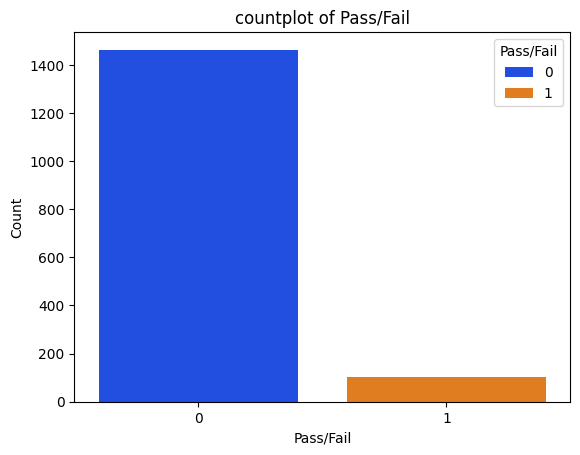

In [ ]:
sns.countplot(x='Pass/Fail', data=final_df, hue=final_df['Pass/Fail'],  palette='bright', legend=True)
plt.title('countplot of Pass/Fail')
plt.xlabel('Pass/Fail')
plt.ylabel('Count')
plt.show()

In [ ]:
count = final_df['Pass/Fail'].value_counts()
count

,count
Pass/Fail,
0,1463
1,104


As we see our dataset is highly imbalane with**1463** 'Pass' and **104** 'Fail'. To treat the class imbalance we proceed with the SMOTE algorithm

# Treat Class Imbalance by SMOTE Algorithm

In [ ]:
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [ ]:
X_train_smote.shape

(2046, 48)

In [ ]:
y_train_smote.shape

(2046,)

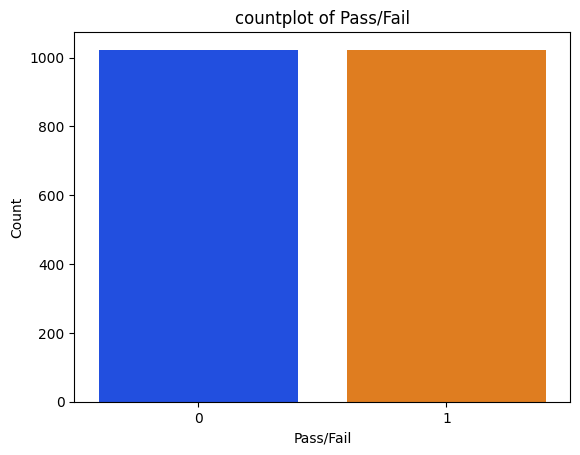

In [ ]:
sns.countplot(x=y_train_smote, palette='bright', hue = y_train_smote, legend=False)
plt.title('countplot of Pass/Fail')
plt.xlabel('Pass/Fail')
plt.ylabel('Count')
plt.show()

In [ ]:
y_train_smote.value_counts()

,count
Pass/Fail,
0,1023
1,1023


Now data is balanced. now we proceed to build the model. We will buld model using PCA to reduce features and without using PCA also

# Model Bulding

In [ ]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(X_train_smote, y_train_smote, test_size=0.3, random_state=42)

In [ ]:
x_train1.shape

(1432, 48)

In [ ]:
pca = PCA(n_components=25)
x_train_pca = pca.fit_transform(x_train1)
x_test_pca = pca.transform(x_test1)

# KNN Model

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

print('KNN MODEL')
# Initialize and train the KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors
knn.fit(x_train1, y_train1)

# Make predictions on the test set
y_pred = knn.predict(x_test1)

# Evaluate the model
print(classification_report(y_test1, y_pred))
print(confusion_matrix(y_test1, y_pred))

# Apply PCA to the training and testing data separately
print('-'*100)
print('After applying PCA :')

# Initialize and train the KNN classifier on the PCA-transformed data
knn = KNeighborsClassifier(n_neighbors=25)  # You can adjust the number of neighbors
knn.fit(x_train_pca, y_train1)

# Make predictions on the PCA-transformed test set
y_pred = knn.predict(x_test_pca)

# Evaluate the model
print(classification_report(y_test1, y_pred))
print(confusion_matrix(y_test1, y_pred))


KNN MODEL
              precision    recall  f1-score   support

           0       1.00      0.60      0.75       305
           1       0.72      1.00      0.84       309

    accuracy                           0.80       614
   macro avg       0.86      0.80      0.79       614
weighted avg       0.86      0.80      0.79       614

[[183 122]
 [  0 309]]
----------------------------------------------------------------------------------------------------
After applying PCA :
              precision    recall  f1-score   support

           0       1.00      0.61      0.76       305
           1       0.72      1.00      0.84       309

    accuracy                           0.81       614
   macro avg       0.86      0.81      0.80       614
weighted avg       0.86      0.81      0.80       614

[[187 118]
 [  0 309]]


# XGBoost Model

In [ ]:
!pip install xgboost

import xgboost as xgb
from sklearn.metrics import classification_report, confusion_matrix

# ... (Your existing code) ...

# Initialize and train the XGBoost classifier
xgb_model = xgb.XGBClassifier(random_state=42, eval_metric='logloss')
xgb_model.fit(x_train1, y_train1)

# Make predictions on the test set
y_pred_xgb = xgb_model.predict(x_test1)

# Evaluate the XGBoost model
print("XGBoost Classification Report:")
print(classification_report(y_test1, y_pred_xgb))
print("XGBoost Confusion Matrix:")
print(confusion_matrix(y_test1, y_pred_xgb))

# Apply PCA to the training and testing data separately (if needed)
# ... (Your PCA code) ...
print('After applying PCA')
print('-'*100)
# Initialize and train the XGBoost classifier on the PCA-transformed data
xgb_model_pca = xgb.XGBClassifier(random_state=42, eval_metric='logloss')
xgb_model_pca.fit(x_train_pca, y_train1)

# Make predictions on the PCA-transformed test set
y_pred_xgb_pca = xgb_model_pca.predict(x_test_pca)

# Evaluate the XGBoost model with PCA
print("\nXGBoost with PCA Classification Report:")
print(classification_report(y_test1, y_pred_xgb_pca))
print("XGBoost with PCA Confusion Matrix:")
print(confusion_matrix(y_test1, y_pred_xgb_pca))


XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.95      0.97       305
           1       0.95      0.99      0.97       309

    accuracy                           0.97       614
   macro avg       0.97      0.97      0.97       614
weighted avg       0.97      0.97      0.97       614

XGBoost Confusion Matrix:
[[290  15]
 [  3 306]]
After applying PCA
----------------------------------------------------------------------------------------------------

XGBoost with PCA Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.92      0.96       305
           1       0.93      0.99      0.96       309

    accuracy                           0.96       614
   macro avg       0.96      0.96      0.96       614
weighted avg       0.96      0.96      0.96       614

XGBoost with PCA Confusion Matrix:
[[281  24]
 [  2 307]]


# Logistic Regression Model

In [ ]:
logisticRegr = LogisticRegression()

# Model fitting/ Training
logisticRegr.fit(x_train1, y_train1)
test_pred = logisticRegr.predict(x_test1)
print('Logistic Regression Report:')
print('Accuracy score:', accuracy_score(y_test1,test_pred))
print(confusion_matrix(y_test1,test_pred))
print(classification_report(y_test1,test_pred))

print('------------After applying PCA-------------------')
# Model fitting/ Training
logisticRegr.fit(x_train_pca, y_train1)
test_pred = logisticRegr.predict(x_test_pca)

print('Accuracy score :', accuracy_score(y_test1,test_pred))
print(confusion_matrix(y_test1,test_pred))
print(classification_report(y_test1,test_pred))

Logistic Regression Report:
Accuracy score: 0.8061889250814332
[[245  60]
 [ 59 250]]
              precision    recall  f1-score   support

           0       0.81      0.80      0.80       305
           1       0.81      0.81      0.81       309

    accuracy                           0.81       614
   macro avg       0.81      0.81      0.81       614
weighted avg       0.81      0.81      0.81       614

------------After applying PCA-------------------
Accuracy score : 0.7687296416938111
[[226  79]
 [ 63 246]]
              precision    recall  f1-score   support

           0       0.78      0.74      0.76       305
           1       0.76      0.80      0.78       309

    accuracy                           0.77       614
   macro avg       0.77      0.77      0.77       614
weighted avg       0.77      0.77      0.77       614



# Random Forest Model

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix


# Initialize and train the Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(x_train1, y_train1)

# Make predictions on the test set
y_pred_rf = rf_classifier.predict(x_test1)

# Evaluate the model
print(classification_report(y_test1, y_pred_rf))
print(confusion_matrix(y_test1, y_pred_rf))

print('-'*100)
print('After applying PCA')
# Initialize and train the Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(x_train_pca, y_train1)

# Make predictions on the test set
y_pred_rf = rf_classifier.predict(x_test_pca)

# Evaluate the model
print(classification_report(y_test1, y_pred_rf))
print(confusion_matrix(y_test1, y_pred_rf))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98       305
           1       0.97      1.00      0.98       309

    accuracy                           0.98       614
   macro avg       0.98      0.98      0.98       614
weighted avg       0.98      0.98      0.98       614

[[296   9]
 [  1 308]]
----------------------------------------------------------------------------------------------------
After applying PCA
              precision    recall  f1-score   support

           0       0.99      0.92      0.95       305
           1       0.92      0.99      0.96       309

    accuracy                           0.95       614
   macro avg       0.96      0.95      0.95       614
weighted avg       0.96      0.95      0.95       614

[[280  25]
 [  3 306]]


As we see Random forest model without using PCA will give better performance so will do hyperparameter tunning on random forest model

In [ ]:
# Define the parameter grid for Random Forest hyperparameter tuning
param_grid_rf = {
    'n_estimators': [20, 30, 40, 50, 60],
    'max_depth': [None, 10, 20,30, 40, 50, 60],
}

# Create a Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)

# Create GridSearchCV object for Random Forest
grid_search_rf = GridSearchCV(rf_model, param_grid_rf, cv=5, scoring='f1')

# Fit the GridSearchCV object to the training data
grid_search_rf.fit(x_train1, y_train1)

# Print the best hyperparameters and score for Random Forest
print("Best Hyperparameters for Random Forest:", grid_search_rf.best_params_)
print("Best Score for Random Forest:", grid_search_rf.best_score_)

# Get the best Random Forest model from the grid search
best_rf_model = grid_search_rf.best_estimator_

# Evaluate the best Random Forest model on the test data
y_pred_best_rf = best_rf_model.predict(x_test1)
print(classification_report(y_test1, y_pred_best_rf))
print(confusion_matrix(y_test1, y_pred_best_rf))


Best Hyperparameters for Random Forest: {'max_depth': 20, 'n_estimators': 50}
Best Score for Random Forest: 0.9742387164607667
              precision    recall  f1-score   support

           0       1.00      0.95      0.98       305
           1       0.96      1.00      0.98       309

    accuracy                           0.98       614
   macro avg       0.98      0.98      0.98       614
weighted avg       0.98      0.98      0.98       614

[[291  14]
 [  0 309]]


# SVM Model

In [ ]:
# Initialize and train the SVM classifier
svm_model = SVC(kernel='linear', random_state=42)  # You can experiment with different kernels
svm_model.fit(x_train1, y_train1)

# Make predictions on the test set
y_pred_svm = svm_model.predict(x_test1)

# Evaluate the SVM model
print("SVM Classification Report:")
print(classification_report(y_test1, y_pred_svm))
print("SVM Confusion Matrix:")
print(confusion_matrix(y_test1, y_pred_svm))
print("SVM Accuracy Score:", accuracy_score(y_test1, y_pred_svm))


print('-'*100)
print('After applying PCA')
# Initialize and train the SVM classifier on the PCA-transformed data
svm_model_pca = SVC(kernel='linear', random_state=42)  # You can experiment with different kernels
svm_model_pca.fit(x_train_pca, y_train1)

# Make predictions on the PCA-transformed test set
y_pred_svm_pca = svm_model_pca.predict(x_test_pca)

# Evaluate the SVM model with PCA
print("\nSVM with PCA Classification Report:")
print(classification_report(y_test1, y_pred_svm_pca))
print("SVM with PCA Confusion Matrix:")
print(confusion_matrix(y_test1, y_pred_svm_pca))
print("SVM with PCA Accuracy Score:", accuracy_score(y_test1, y_pred_svm_pca))

SVM Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.79      0.81       305
           1       0.80      0.85      0.83       309

    accuracy                           0.82       614
   macro avg       0.82      0.82      0.82       614
weighted avg       0.82      0.82      0.82       614

SVM Confusion Matrix:
[[241  64]
 [ 46 263]]
SVM Accuracy Score: 0.8208469055374593
----------------------------------------------------------------------------------------------------
After applying PCA

SVM with PCA Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.71      0.76       305
           1       0.75      0.84      0.79       309

    accuracy                           0.78       614
   macro avg       0.78      0.78      0.78       614
weighted avg       0.78      0.78      0.78       614

SVM with PCA Confusion Matrix:
[[218  87]
 [ 48 261]]
SVM with PCA Accuracy Sc

# Gradient Boosting

In [ ]:
# Initialize and train the Gradient Boosting Classifier
gb_classifier = GradientBoostingClassifier(random_state=42)
gb_classifier.fit(x_train1, y_train1)

# Make predictions on the test set
y_pred_gb = gb_classifier.predict(x_test1)

# Evaluate the model
print(classification_report(y_test1, y_pred_gb))
print(confusion_matrix(y_test1, y_pred_gb))

print('-'*100)
print('After applying PCA')
# Initialize and train the Gradient Boosting Classifier
gb_classifier_pca = GradientBoostingClassifier(random_state=42)
gb_classifier_pca.fit(x_train_pca, y_train1)

# Make predictions on the test set
y_pred_gb_pca = gb_classifier_pca.predict(x_test_pca)

# Evaluate the model
print(classification_report(y_test1, y_pred_gb_pca))
print(confusion_matrix(y_test1, y_pred_gb_pca))

              precision    recall  f1-score   support

           0       0.98      0.92      0.95       305
           1       0.92      0.98      0.95       309

    accuracy                           0.95       614
   macro avg       0.95      0.95      0.95       614
weighted avg       0.95      0.95      0.95       614

[[280  25]
 [  5 304]]
----------------------------------------------------------------------------------------------------
After applying PCA
              precision    recall  f1-score   support

           0       0.98      0.88      0.93       305
           1       0.89      0.98      0.93       309

    accuracy                           0.93       614
   macro avg       0.94      0.93      0.93       614
weighted avg       0.93      0.93      0.93       614

[[267  38]
 [  5 304]]


# **Conclusion ** :
The Random Forest model, without PCA, achieved the highest accuracy (98%) and a recall of 100% for class 0.  Hyperparameter tuning further optimized this model.  Other models like XGBoost, Logistic Regression, SVM, and Gradient Boosting were also tested, but Random Forest demonstrated superior performance in this specific context.  The dataset, initially imbalanced, was addressed using SMOTE, and feature engineering involved removing features with low correlation to the target variable and highly correlated independent features.  PCA was explored, but did not improve the results compared to the non-PCA version of the Random Forest model.
